# [DSL]Basic Session 2_Crawling

220111 기초세션 Crawling 발표자 - 장윤태 <br><br>
데이터 수집의 기본이라고 할 수 있는 크롤링에 대해서 알아보자!

## 강의 전 사전세팅

<b>가상환경 세팅</b><br>
가상환경 (Virtual Environments) : 자신이 원하는 Python 환경을 구성하기 위해 필요한 모듈만 담아 놓는 바구니<br><br>
<b>가상환경이 필요한 이유</b><br>
프로젝트 진행 시 서로 다른 패키지, 혹은 다른 버전의 라이브러리가 필요합니다. 한 곳의 작업환경에서 모든 프로젝트를 진행하게되면 여러 패키지, 라이브러리 간 충돌이 발생합니다. 이를 방지하기 위해 각 프로젝트 별로 독립된 작업환경 구축이 필요하기에 가상환경이 필요합니다.<br>
특히, 크롤링에 필요한 패키지들을 가상환경 없이 설치하려고 하면 에러가 발생할 수 있습니다.

<b>세팅 과정</b><br>
1. Anaconda Prompt (Anaconda3) 실행<br>
2. 하위의 명령어 입력<br><br>
\#conda 업데이트<br>
conda update conda<br><br>

\#python 3.7 버전에 Crawling이라는 이름을 가진 가상환경 생성<br>
conda create --name Crawling python=3.7<br>

\#만들어진 가상환경 리스트 확인<br>
conda info --envs<br><br>

\#Crawling 이름의 가상환경 활성화 (윈도우)<br>
activate Crawling<br>
\#Crawling 이름의 가상환경 활성화 (맥)<br>
source activate Crawling<br><br>

\#jupyter notebook 실행<br>
jupyter notebook<br>

<b>가상환경 관련 conda 명령어</b><br>
가상환경 생성 : conda create -n [가상환경 이름] python=[원하는 파이썬 버전 (ex 3.7)]<br>
가상환경 리스트 확인 : conda info -envs<br>
가상환경 활성화 : activate [가상환경 이름] / source activate [가상환경 이름]<br>
가상환경 비활성화 : conda deactivate<br>
가상환경 삭제 : conda env remove -n [가상환경 이름]<br>
현재 가상환경의 위치는 anaconda prompt 처음 접속 시 뜨는 (base)와 같이 ([가상환경 이름])으로 파악

<b>크롬드라이버 다운</b><br>
셀레늄 라이브러리로 크롤링을 진행하기 위해서는 크롬드라이버 다운 및 경로 파악 과정이 필요합니다.
<ol>
    <li>크롬 주소 창에 'Chrome://version' 입력하여 자신 컴퓨터의 크롬 버전 확인 (Chrome: xx.x.xxxx.xx)</li>
    <li><a href = 'https://sites.google.com/a/chromium.org/chromedriver/downloads'>크롬드라이버 다운로드</a> 사이트에 접속하여 자신의 버전 맨 앞 두 숫자에 맞는 크롬 드라이버 클릭</li>
    <li>컴퓨터 운영채제에 맞는 크롬드라이버 다운로드</li>
    <li>압축해제 및 chromedriver 마우스 우클릭 - 속성 - 위치로 경로 파악</li>

<b>코랩에서의 크롬드라이버 다운</b>

In [ ]:
#구글 드라이브 접속 권한 획득
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#ubuntu 업데이트
!apt-get update

#셀레늄 패키지 다운
!pip install selenium

#크롬드라이버 다운
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

#크롬드라이버 경로 설정
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

#코랩에서 작동하도록 옵션 설정
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

## 크롤링이 무엇인가?

<img src = 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA1MjlfNzUg%2FMDAxNTkwNjg5NTY1OTA1.Bh36HthLf4IdgFAguxjQczBPSkpDsP9GwWmWFl9c3eQg.sKgbUVyTdjjYh9b_PE4uEhe59FsZnkVsgiiPph4vCqkg.PNG.ree31206%2F%25C5%25A9%25B7%25D1%25B8%25B5.png&type=sc960_832'>

Crawling : 검색 엔진 로봇을 이용한 데이터 수집 방법 <br>
Crawler : 크롤링을 위해 개발된 소프트웨어 <br><br>
<b>크롤링이 필요한 이유?</b> <br>
정형화된 데이터만 존재하지 않는다. <br>
정형화된 데이터를 만들기 위해서는 온라인에 퍼져있는 여러 정보를 긁어모아 데이터화시키는 작업이 필수 <br>
이를 위해 필요한 기술이 크롤링!

## 크롤링의 기본 원리

<img src = 'https://ingeniouslab.co.kr/wp-content/uploads/2019/09/%ED%81%AC%EB%A1%A4%EB%9F%AC1-1024x243.png'>

<ol>
    <li>파이썬의 크롤러로 웹서버에 정보 요청</li>
    <li>서버 응답을 받은 후 웹서버와 상호작용하며 정보 획득</li>
    <li>획득한 정보를 핸들링하여 데이터화</li>
</ol>

## 웹서버의 정보 구성 방식

<img src = 'https://media.vlpt.us/images/offdutybyblo/post/65c734fd-077c-4a68-8b3b-557c52428511/htmljscss.jpeg'>

HTML : 웹 브라우저에서 문서 및 웹 페이지가 표시되는 방법을 규정하는 언어 <br>
CSS : HTML로 만들어진 문서의 스타일을 지정하는 방식을 규정하는 스타일 시트 언어 <br>
JavaScript : 웹 사이트에서 HTML과 CSS의 구성요소들을 변경할 수 있게 해주는 언어 <br><br>
Xpath : 확장 생성 언어 문서의 구조를 통해 경로 위의 지정한 구문을 사용하여 항목을 배치하고 처리하는 방법을 기술하는 언어

<b>html 문서 예시</b>

<img src = 'https://t1.daumcdn.net/cfile/tistory/247AB04358CCE40F23'>

갈색 : tag <br>
tag 내부 빨간색 : type <br>
" ", ' ' 내부 파란색 : value <br>
type과 value는 tag가 지닌 attribute <br><br>

<b>크롤링 관련 html 문서에서 유의할 점</b>
<ol>
    <li>크롤링할 대상 내용들은 주로 body 태그에 존재</li>
    <li>html 문서는 열고 닫는 개념이 존재하며 그 사이에 있는 텍스트를 주로 추출</li>
    <li>Xpath 특성 상 tag간 부모-자식-형제 관계가 존재하므로 상하관계 파악 필요</li>
</ol>
즉, html 문서에서 내가 찾고자 하는 정보(텍스트)의 경로를 태그 상하관계 or Xpath로 파악한 뒤 해당 태그에 기입되어 있는 정보를 추출하여 사용


## 크롬에서 웹페이지의 html 문서 및 Xpath 찾는 법

<b>html 문서 (개발자 도구 활용)</b>
<ol>
    <li>정보를 추출하고자 하는 element에 마우스 우클릭 - [검사]</li>
    <li>우측 상단 닫기 버튼 밑 Chrome 맞춤설정 및 제어 버튼 클릭 - [도구 더 보기] - [개발자도구]</li>
    <li>키보드 f12</li>
</ol>
1번의 방법이 해당 element의 html 코드를 바로 볼 수 있기에 권장 <br>
2, 3번의 경우 element를 찾기 위해서 [Select an element in the page to inspect it] or Ctrl+Shift+C - 브라우저에서 추출하고자 하는 element 클릭 과정이 더 필요

<b>Xpath 경로</b><br>
찾은 element의 html 코드에서 마우스 우클릭 - [Copy] - [CopyXPath]

## 패키지 다운로드

In [ ]:
#정보 요청 라이브러리
!pip install requests

#크롤링의 대부 라이브러리
!pip install beautifulsoup4

#구문 분석 라이브러리
!pip install lxml

#동적 컨트롤도 가능한 크롤링 라이브러리
!pip install selenium

## HTTP 응답코드

내가 크롤링하고자 하는 사이트가 접속이 가능한지 불가능한지 알 수 있는 코드 <br><br>
1xx : 요청을 받았으며 작업이 진행 중인 경우 <br>
2xx : 요청 ok, 작업 ok <br>
4xx : 요청이 올바르지 않은 경우 <br>
5xx : 서버가 응답하지 않는 경우 <br><br>
즉 200 - 크롤링 가능, 그 외 - 크롤링 불가능 (세부 원인은 검색)

In [17]:
#정보요청 라이브러리 import
import requests

In [2]:
#네이버로 정보요청
res1 = requests.get("https://www.naver.com/")

In [41]:
#네이버로부터 받은 응답코드 출력
print("응답코드 :", res1.status_code)

응답코드 : 200


In [4]:
#나도코딩 티스토리로 정보요청
res2 = requests.get("https://nadocoding1.tistory.com")

In [5]:
#나도코딩 티스토리로부터 받은 응답코드 출력
print("응답코드 :", res2.status_code)

응답코드 : 404


In [6]:
#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
res1.raise_for_status()
print("웹 크롤링을 진행합니다.")

웹 크롤링을 진행합니다.


'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
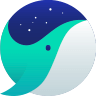
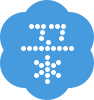

In [7]:
#네이버로부터 받은 html 문서 정보 전체 출력
res1.text

In [8]:
# 네이버 html 문서를 naver html 파일로 저장 
with open('naver.html', 'w', encoding = 'utf8') as f:
    f.write(res1.text)

## 1. 네이버 뉴스 크롤링

In [18]:
#정보요청 라이브러리 import
import requests

#크롤링 라이브러리 import
from bs4 import BeautifulSoup 

<b>로봇으로 인식 방지</b><br>
코드를 바탕으로 크롤링 시 로봇으로 인식하고 접속을 차단하는 경우 존재 <br>
엄연히 한 유저로서 정보를 추출한다는 표시인 User-Agent 필요 <br>
자신의 User-Agent는 <a href = 'https://www.whatismybrowser.com/detect/what-is-my-user-agent'>'what is my useragent'</a> 사이트에 접속

In [19]:
#User-Agent 지정
headers = {'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'}

In [11]:
#크롤링 할 대상 url 지정
url = 'https://news.naver.com'

#크롤링 대상 url과 headers를 기반으로 정보 요청
res = requests.get(url, headers = headers)

#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
res.raise_for_status()

#html문서를 beautifulsoup의 lxml 형태로 변환
soup = BeautifulSoup(res.text, 'lxml') 

<b>단일 추출</b>

In [12]:
#html문서에서 main_brick_item이라는 이름의 class를 지닌 div element를 선택
div1 = soup.find('div', attrs = {'class' : 'main_brick_item'})

#선택한 element 내용 출력
div1

<div class="main_brick_item">
<div class="comp_journal_subscribe">
<div class="cjs_title_wrap">
<h3 class="cjs_edit_title">
<span class="cjs_main">언론사편집</span>
<a class="cjs_subscribe_a" href="#feedCard" onclick="nclk(event, 'home.editassetting', '', '')">
<span class="subs_text">기자
                        
                    </span>
<span class="subs_text">연재
                        
                    </span>
</a>
</h3>
<a class="cjs_more_link" href="https://media.naver.com/channel/settings" onclick="nclk(event, 'home.editsetting', '', '')">
                구독설정
                
                <span class="ico_more"></span>
</a>
</div>
</div>
</div>

In [13]:
#div1 element에서 첫번째로 발견되는 a element를 반환
div1.a

<a class="cjs_subscribe_a" href="#feedCard" onclick="nclk(event, 'home.editassetting', '', '')">
<span class="subs_text">기자
                        
                    </span>
<span class="subs_text">연재
                        
                    </span>
</a>

In [14]:
#div1 element에서 첫번째로 발견되는 a element의 attribute 추출
div1.a.attrs

{'href': '#feedCard',
 'class': ['cjs_subscribe_a'],
 'onclick': "nclk(event, 'home.editassetting', '', '')"}

In [15]:
#div1 element에서 첫번째로 발견되는 a element의 class attribute 정보 추출
div1.a['class']

['cjs_subscribe_a']

In [16]:
#div1 element에서 첫번째로 발견되는 a element의 글자 추출
div1.a.get_text()

'\n기자\n                        \n                    \n연재\n                        \n                    \n'

<b>다중 추출</b>

In [17]:
#크롤링 할 대상 url 지정
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

#크롤링 대상 url과 headers를 기반으로 정보 요청
res = requests.get(url, headers = headers)

#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
res.raise_for_status()

#html문서를 beautifulsoup의 lxml 형태로 변환
soup = BeautifulSoup(res.text, 'lxml') 

In [18]:
#html문서에서 cluster_text_headline nclicks(cls_pol.clsart)라는 이름의 class를 지닌 a 태그의 element들 모두 선택
a1 = soup.findAll('a', attrs = {'class' : 'cluster_text_headline nclicks(cls_pol.clsart)'})

#선택한 element들 내용 출력
a1

[<a class="cluster_text_headline nclicks(cls_pol.clsart)" href="https://news.naver.com/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=056&amp;aid=0011192124">‘공공기관 노동이사제’·‘만16세 정당가입’ 법사위 통과…내일 본회의</a>,
 <a class="cluster_text_headline nclicks(cls_pol.clsart)" href="https://news.naver.com/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=022&amp;aid=0003656231">‘공공기관 노동이사제’ 법사위 통과… 11일 본회의 상정</a>,
 <a class="cluster_text_headline nclicks(cls_pol.clsart)" href="https://news.naver.com/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=016&amp;aid=0001935640">高1도 당원된다</a>,
 <a class="cluster_text_headline nclicks(cls_pol.clsart)" href="https://news.naver.com/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=421&amp;aid=0005836293">'고1도 정당 가입' 정당법 법사위 통과…3·9 재보선부터 '고3 공천'</a>,
 <a class="cluster_text_headline nclicks(cls_pol.clsart)" href="https://news.naver.com/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=023&amp;aid=0003665426">與 “安은 윤석열 아바타”

In [19]:
#각 뉴스 제목과 링크를 추출할 반복문 생성
for a in a1:
    
    #a 태그의 element의 text 선택 및 공백 제거
    title = a.get_text()
    
    #a 태그의 element 내에서 href class attribute 정보 추출 및 링크 생성
    link = a['href']
    
    #기사 제목과 해당 링크 출력
    print(f'기사 제목 : {title}') 
    print(f'(링크 : {link})')

기사 제목 : ‘공공기관 노동이사제’·‘만16세 정당가입’ 법사위 통과…내일 본회의
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=056&aid=0011192124)
기사 제목 : ‘공공기관 노동이사제’ 법사위 통과… 11일 본회의 상정
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=022&aid=0003656231)
기사 제목 : 高1도 당원된다
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=016&aid=0001935640)
기사 제목 : '고1도 정당 가입' 정당법 법사위 통과…3·9 재보선부터 '고3 공천'
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=421&aid=0005836293)
기사 제목 : 與 “安은 윤석열 아바타” 공격모드로 돌변
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=023&aid=0003665426)
기사 제목 : “安 국가 발전에 필요한 분”이라던 與…‘마의 15%’ 벽 넘자 “‘MB 아바타’ 넘어 ‘尹 아바타’”
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=022&aid=0003656271)
기사 제목 : 與, 안철수 상승세에 “망언하는 윤석열 아바타” 싸잡아 비난
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=005&aid=0001497572)
기사 제목 : 민주당, 안철수 본격 견제…"안 후보는 MB 넘어 윤석열 아바

In [20]:
#페이지 별로 추출하는 반복문 생성
for i in range(5):
    #페이지 별로 요청을 보내고 soup의 lxml 형태로 변환
    url = f'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100#&date=%2000:00:00&page={i}'
    res = requests.get(url, headers = headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, 'lxml') 
    
    #html문서에서 cluster_text_headline nclicks(cls_pol.clsart)라는 이름의 class를 지닌 a 태그의 element들 모두 선택
    a2 = soup.findAll('a', attrs = {'class' : 'cluster_text_headline nclicks(cls_pol.clsart)'})
    
    #각 뉴스 제목과 링크를 추출할 반복문 생성
    for a in a2:
        title = a.get_text().strip()
        link = a['href']
        print(f'기사 제목 : {title}') 
        print(f'(링크 : {link})')

기사 제목 : ‘공공기관 노동이사제’·‘만16세 정당가입’ 법사위 통과…내일 본회의
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=056&aid=0011192124)
기사 제목 : ‘공공기관 노동이사제’ 법사위 통과… 11일 본회의 상정
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=022&aid=0003656231)
기사 제목 : 高1도 당원된다
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=016&aid=0001935640)
기사 제목 : '고1도 정당 가입' 정당법 법사위 통과…3·9 재보선부터 '고3 공천'
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=421&aid=0005836293)
기사 제목 : 與 “安은 윤석열 아바타” 공격모드로 돌변
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=023&aid=0003665426)
기사 제목 : “安 국가 발전에 필요한 분”이라던 與…‘마의 15%’ 벽 넘자 “‘MB 아바타’ 넘어 ‘尹 아바타’”
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=022&aid=0003656271)
기사 제목 : 與, 안철수 상승세에 “망언하는 윤석열 아바타” 싸잡아 비난
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=005&aid=0001497572)
기사 제목 : 민주당, 안철수 본격 견제…"안 후보는 MB 넘어 윤석열 아바

기사 제목 : ‘공공기관 노동이사제’·‘만16세 정당가입’ 법사위 통과…내일 본회의
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=056&aid=0011192124)
기사 제목 : ‘공공기관 노동이사제’ 법사위 통과… 11일 본회의 상정
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=022&aid=0003656231)
기사 제목 : 高1도 당원된다
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=016&aid=0001935640)
기사 제목 : '고1도 정당 가입' 정당법 법사위 통과…3·9 재보선부터 '고3 공천'
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=421&aid=0005836293)
기사 제목 : 與 “安은 윤석열 아바타” 공격모드로 돌변
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=023&aid=0003665426)
기사 제목 : “安 국가 발전에 필요한 분”이라던 與…‘마의 15%’ 벽 넘자 “‘MB 아바타’ 넘어 ‘尹 아바타’”
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=022&aid=0003656271)
기사 제목 : 與, 안철수 상승세에 “망언하는 윤석열 아바타” 싸잡아 비난
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=005&aid=0001497572)
기사 제목 : 민주당, 안철수 본격 견제…"안 후보는 MB 넘어 윤석열 아바

기사 제목 : ‘공공기관 노동이사제’·‘만16세 정당가입’ 법사위 통과…내일 본회의
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=056&aid=0011192124)
기사 제목 : ‘공공기관 노동이사제’ 법사위 통과… 11일 본회의 상정
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=022&aid=0003656231)
기사 제목 : 高1도 당원된다
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=016&aid=0001935640)
기사 제목 : '고1도 정당 가입' 정당법 법사위 통과…3·9 재보선부터 '고3 공천'
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=421&aid=0005836293)
기사 제목 : 與 “安은 윤석열 아바타” 공격모드로 돌변
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=023&aid=0003665426)
기사 제목 : “安 국가 발전에 필요한 분”이라던 與…‘마의 15%’ 벽 넘자 “‘MB 아바타’ 넘어 ‘尹 아바타’”
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=022&aid=0003656271)
기사 제목 : 與, 안철수 상승세에 “망언하는 윤석열 아바타” 싸잡아 비난
(링크 : https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=100&oid=005&aid=0001497572)
기사 제목 : 민주당, 안철수 본격 견제…"안 후보는 MB 넘어 윤석열 아바

<b>뷰티풀숲의 유용한 함수</b><br>
soup.select([상위 태그부터 차례대로 목표 태그까지 작성])     (ex. soup.select('ul.type01 > li > dl > dt > a')) <br><br>
find([태그], {[속성] : [속성 내용]})<br>
findAll([태그], {[속성] : [속성 내용]})<br>
[태그].attrs     (ex. a.attrs))<br>
[태그][[속성]]     (ex. a['class']))<br>
[태그].get_text()     (ex. a.get_text())<br>
대상으로 할 element를 변수로 지정한 후 [변수].[함수]와 같이 사용<br><br>

## 2. 네이버 항공권 크롤링

In [24]:
#셀레늄 라이브러리 불러오기
from selenium import webdriver

#셀레늄에서 html문서가 생성될 때까지 대기하는 함수 불러오기
from selenium.webdriver.support.ui import WebDriverWait

#셀레늄에서 조건을 걸어줄 수 있는 함수 불러오기
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [28]:
#크롬드라이버 경로 설정
path = 'C:\\Users\\endea\\Desktop\\data\\chromedriver_win32\\chromedriver'

#드라이버 객체 생성
browser = webdriver.Chrome(path)
#코랩에서 작업시 option 추가
#browser = webdriver.Chrome(path, options = options)

C:\Users\endea\AppData\Local\Temp/ipykernel_17796/808309575.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(path)


In [30]:
#네이버 항공권 예매 사이트로 접속
browser.get('https://flight.naver.com/')

In [23]:
#가는 날 클릭 
browser.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[2]/button[1]').click()

In [25]:
#이번달 27일, 다음달 28일 선택
browser.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[10]/div[2]/div[1]/div[2]/div/div[2]/table/tbody/tr[5]/td[4]/button').click()
browser.implicitly_wait(time_to_wait=2)
browser.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[10]/div[2]/div[1]/div[2]/div/div[3]/table/tbody/tr[5]/td[1]/button').click()

In [26]:
#도착지 선택
browser.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[1]/button[2]').click()

In [27]:
#국내 선택
browser.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[10]/div[2]/section/section/button[1]').click()

In [28]:
#제주 선택
browser.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[10]/div[2]/section/section/div/button[2]').click()

In [29]:
# 항공권 검색 클릭
browser.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[4]/div/div/button').click()

try:
    #10초 간 대기하면서 지정한 xpath가 존재 시 동작 수행
    elem = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div[2]/div[2]')))
    # 성공했을 때 첫 번째 결과 출력
    print(elem.text)
finally:
    browser.quit()

제주항공
1%적립이벤트혜택
06:00GMP
07:05CJU
01시간 05분
특가석편도 24,750원~
네이버페이 결제시 1%+1,500원 적립편도 23,745원~


<b>셀레늄 대상 지정 함수</b><br>
find_element_by_class_name(self, name)<br>
find_element_by_css_selector(self, css_selector)<br>
find_element_by_id(self, id_)<br>
find_element_by_link_text(self, link_text)<br>
find_element_by_name(self, name)<br>
find_element_by_partial_link_text(self, link_text)<br>
find_element_by_tag_name(self, name)<br>
find_element_by_xpath(self, xpath)<br>
다중 지정은 find_element 대신에 find_elements<br>
browser.[함수]와 같이 사용<br><br>

<b>셀레늄 로딩 대기 함수</b><br>
암묵적 대기(무조건 대기) : browser.implicitly_wait(time_to_wait=[대기 시간 (초)])<br>
명시적 대기(조건 충족 시 대기 해제) : 위 코드에서 try ~ finally 부분<br>
time 라이브러리의 sleep([대기 시간 (초)]) 함수를 이용해 대기 가능<br><br>

<b>셀레늄 대기 조건 함수</b><br>
title_is<br>
title_contains<br>
presence_of_element_located<br>
visibility_of_element_located<br>
visibility_of<br>
presence_of_all_elements_located<br>
text_to_be_present_in_element<br>
text_to_be_present_in_element_value<br>
frame_to_be_available_and_switch_to_it<br>
invisibility_of_element_located<br>
element_to_be_clickable<br>
staleness_of<br>
element_to_be_selected<br>
element_located_to_be_selected<br>
element_selection_state_to_be<br>
element_located_selection_state_to_be<br>
alert_is_present<br>
이 외에도 \__init__ 함수와 \__call__ 함수를 구현한 class를 활용한 custom 조건도 가능<br>
대상으로 할 element를 변수로 지정한 후 [변수].[함수]와 같이 사용<br><br>

<b>셀레늄 상호작용 함수</b><br>
텍스트 입력 : send_keys([입력할 내용 (문자열)])<br>
키보드 키 : send_keys(Keys.[버튼이름 (CANCLE, TAB, BACKSPACE, ENTER 등...)])<br>
텍스트 입력 지우기 : clear()<br>
파일 업로드 : send_keys(file_path)<br>
클릭 : click()<br>
옵션 선택 : select_by_index, select_by_visible_text, select_by_value<br>
옵션 전체 해제 : deselect_all()<br>
옵션 제출 : submit()<br>
JavaScript 코드 실행 : execute_script()<br>
대상으로 할 element를 변수로 지정한 후 [변수].[함수]와 같이 사용<br><br>

<b>브라우저 상호작용 함수</b><br>
최대화 : maximize_window()<br>
최소화 : minimize_window()<br>
뒤로가기 : back()<br>
앞으로가기 : forward()<br>
새로고침 : refresh()<br>
스크린샷 저장 : save_screenshot([파일명])<br>
스크롤 내리기 : execute_script('window.scrollTo(0, document.body.scrollHeight);')<br>
종료 : quit()<br>
browser.[함수]와 같이 사용

## 3. 구글 이미지 크롤링

<b>beautifulsoup 활용</b>

In [31]:
#정보요청 라이브러리1 불러오기
import requests

#정보요청 라이브러리2 불러오기
import urllib

#beautifulsoup 라이브러리 불러오기
from bs4 import BeautifulSoup 

In [33]:
#크롤링 할 대상 url 지정
url = 'https://www.google.com/search?q=%EC%BD%94%EC%B9%B4%EC%BD%9C%EB%9D%BC&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi21s-08qb1AhVPCqYKHU73AsQQ_AUoAXoECAMQAw&cshid=1641807941462513&biw=1536&bih=754&dpr=1.25'

#크롤링 대상 url과 headers를 기반으로 정보 요청
res = requests.get(url, headers = headers)

#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
res.raise_for_status()

#html문서를 beautifulsoup의 lxml 형태로 변환
soup = BeautifulSoup(res.text, 'lxml') 

In [34]:
#html문서에서 rg_i Q4LuWd라는 이름의 class를 지닌 img 태그의 element들 모두 선택
imgs = soup.findAll('img', attrs = {'class' : 'rg_i Q4LuWd'})

In [35]:
for index, img in enumerate(imgs):
    try:
        image_url = img['src']
        urllib.request.urlretrieve(image_url, '코카콜라' + str(index) + '.jpg')
    except:
        pass

<b>selenium 활용</b>

In [32]:
#셀레늄 라이브러리 불러오기
from selenium import webdriver

#키보드 자판을 입력할 수 있는 셀레늄 함수 불러오기
from selenium.webdriver.common.keys import Keys

#시간에 따른 컨트롤이 가능한 라이브러리 불러오기
import time

In [36]:
#크롬드라이버 경로 설정
path = 'C:\\Users\\admin1\\Desktop\\DSL\\22-1 활동\\220111_기초세션_crawling\\chromedriver'

#드라이버 객체 생성
browser = webdriver.Chrome(path)

In [37]:
#구글 검색 사이트로 접속
browser.get('https://www.google.co.kr/')

In [41]:
#검색창 경로 찾은 후 음료수 제품명 입력 후 엔터
browser.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys('코카콜라')
browser.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys(Keys.ENTER)

In [42]:
#이미지 블럭 클릭
browser.find_element_by_xpath('//*[@id="hdtb-msb"]/div[1]/div/div[2]/a').click()

In [24]:
#스크롤 시 이미지가 더 많이 생성되므로 자동으로 스크롤 하는 반복문 생성
while True:
    
    #현재 문서의 스크롤 높이를 저장
    now_scroll = browser.execute_script('return document.body.scrollHeight')
    
    #페이지 최하단으로 스크롤
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    
    #페이지 로딩 대기
    time.sleep(1)
    
    #스크롤 한 문서의 스크롤 높이를 저장
    last_scroll = browser.execute_script('return document.body.scrollHeight')
    
    #현재 높이와 이전 높이가 같은 경우 반복문을 탈출하는 조건문 생성
    if now_scroll == last_scroll:
        
        #더보기 버튼이 있는 경우 클릭 후 탈출 그 외는 그냥 탈출
        try:
            browser.find_element_by_css_selector('.mye4qd').click()
            break
        except:
            break

In [44]:
#페이지에서 이미지에 해당하는 css 태그를 지정해 이미지 찾기
images = browser.find_elements_by_css_selector('.rg_i.Q4LuWd')

In [45]:
#찾은 이미지 개수 초기값 지정
num = 1

#이미지들마다 클릭하여 원본 이미지를 불러올 수 있도록 하는 반복문
for image in images:
        
    #이미지 클릭
    image.click()

    #이미지 로딩 대기
    time.sleep(2)

    #이미지 url 지정
    image_url = browser.find_element_by_xpath('//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div/a/img').get_attribute('src')

    #자동화로 접속할 수 없는 경우 opener 함수로 접속할 수 있게 함수 생성
    opener = urllib.request.build_opener()

    #사용자 헤더 지정
    opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36')]

    #opener 함수로 이미지 접속
    urllib.request.install_opener(opener)

    #확장자와 위치를 설정해 해당 이미지를 다운로드
    urllib.request.urlretrieve(image_url, '코카콜라' + str(num) + '.jpg')

    #이미지 개수 1 증가
    num += 1

    #이미지 개수 10개 초과 시 반복문 탈출
    if num > 10:
        break

ElementClickInterceptedException: Message: element click intercepted: Element <img src="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxQSEhUTExIWFhUXGBgaFxgYGBcaGhgeGiAWGhcYGBcgHiogGBolHRcXITEhJSkrLi4uGiIzODMtNyktLisBCgoKDg0OGxAQGy0lICYuLS8vLy0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAACAwADAQAAAAAAAAAAAAAABgQFBwECAwj/xABMEAACAQIEAwUEBwQHBgMJAAABAhEAAwQSITEFBkETIlFhcQcygZEUI0KhscHRM1Ji8HKCkrLC0uEkNHOT4vFDRPIVFhdUY3SDotP/xAAaAQACAwEBAAAAAAAAAAAAAAAABAIDBQEG/8QANREAAQQBAwIEBAYBBAMBAAAAAQACAxEhBBIxQVEFEyJhcYGh8BQykbHB0eEjcpLxQlKyNP/aAAwDAQACEQMRAD8A3GiiihCKKKKEIooooQiiiihCKKKKEIoqFiuJWbej3VB8J1/sjWvLEcZtJYGILTbMQY8TA0O2tCFZUVV4Pjtm6uZbiR5soPymhOOWCY7a38XA/GhCtKKq7vHLC73bfwuL+tdjxi3GbMhHk6frQhWVFLD87YYTObT+iflrrTFZuhxI2NCF60UUUIRRRRQhFFFFCEUUUUIRRRRQhFFFFCEUUUUIRRRRQhFFQ8dj0sqWcxHQak+gFKPC/aLYv4z6MrLqpI1JMg6qT7sxrlBkRQhPM1CxfFLVo5XuAMenX5Uq4Thn+1XgbtzKG0GYgwQG6RO8VfjC2bQ0UAnqdyfzNCFHxnMqgfV27jnyWB821+6qa9zHimkC1bTzaW+Q0H41xxTmAgsqWyxkqkAwSuYMDA0IKMY3IE0q47jRQfWXUQyND78QJ7g1nNPT/UJA5XWtLjtaLPsrZuHdq2e6+Yn4D5CBXPMmIA4VcszIS7bt/wBRmVlH4j4UrNzXbA07S6R1ns1J/H7qgYnmM3rdyz2aor9kQFmcyOp1J30Z/DaqXzNogFaml8N1Ie2RzaAI5557cpz4Bes28OCLCkLodTpO0jwOtQuKcyWJI+jJ8Z/WrPkzDo1lZkhy1q7qsKHA7MkRpLDRp3UDrS1huEZsclm8jFWLZguhIGbvKRvGVjA6iInSlXF20UvQQtg82XffpBPJyBd1n2v4EHqqbiOJsXDJtAehI/Or32ZYOw+MkIe7bdhJnwX8HNd+I8koFN2zc7Ww8ZLq69kdSe2QCQNRLDVYkjpXT2e2zhuJdi8hirqwIjKwXMV8xK6EaHSKgwOEjb7qeskhk0sghJsNOM3jmwciuCDkdqq2Dnvi1q3dWz2SsQob0LEgfEBZ+NPnAGmyvpWS84qj4vFM7DMuUAFwvuqo2ymddhIJ18K1flz9gvpT0brLl5nXRNjihA525+JDT/KtaKKKtWaiiiihCKKKKEIooooQiiiihCKKKKEIooqrxHHLCTN5ZmIBkk+CgbmhCsyYpT5x57w3DxFx5udLSQ1w/DZR5movGcfiHVm7T6NZ8dO0I8j0+H3VkvG3tC7bCo1tbjaYi6rMW6Fgeu42PXU1y10C1zzVzri+ISrf7Jhj/wCGp+scf/Ufc+mg8jVR9EbD2hcRcmW5lB17RHXUZwR3dhofEad4T0u3kTMiqt9mDpdck5ARlAyN9pS3aN3YMZJIIMjXGuntLrl3/ePTyQbKPSqnyhvxWhpPD5Z8jDe5/jv+3utLsc4oy4fEuLga4uR0SABctwGzEwYhljyg0y2uPPeSbKW0ZpgN3pOwAYwoJ0gERWLduQsdMwMeBEifiDr6CtG5LxaFCriQRvAbKTpmyneIGnmarEpcaWw7wqGCIurcQeucfDjrx1S/zLxLEu5W9cuAgkZfdjxGXQCqbE8t4gKjtbYW3AYOoZlCsAQxyyQIPhNaLzjw5bttLzh2KqVe9ZUOhA9x26kgaGSpB8YqvwWJiwiDEmyU7i3V72HuCS4W6jD6q53j7wUka66UuWDfTj9/NOu1ZGla6BoGaIo18RtHfP5SaztwkD6AUTMWBBMKw7wPj3vst/C0HyrytjvL5MPxrRzhcRct3UZcMxdCFuoTDn7M6biZDTAPSs6Ud9f6Q/EVORmylXodX57Xg1Y7G+fsrT+T7BWxdvyMiLDK3u3c29s/CI8yK9XwAb6/Cuz21bOVHevYW5vmC7upjvL9oDqVDDy4crvw+2ltSQbrl43JCpl03Oh6eFLfCr99cWosP2bknxywBmIIAMiAdIOu2tRcQA0EKxsTnmWRrgCCcHI2j/25rqQausZBpOXC37a8z4e4uHxszesMSbN/qXWNYYd7MASJmNcxXuZ8U9jjS3bmTutbMqCJQkDXX3ssg+nhV7isZhMSiYjEgo6sEGJwxuAArlKkqwzIZYRKt5HUUh83XbFzGO2GctbMGSCNY72WQDE/6aRRI6m4PW/sf1gpfRxF85D2kelzTYuuBW/qB0DsgY4oq95jxNxMRjUS3mUscxgmJyjcHoCT8PCtU5c/YL6VknE8T2jOWZh2yWj3csT2VrPmBEt3g3URr40x4H2gCwot9gWjSQRrV0czGk2UhrNBPM2Py2XQzR9mjNn2PC02ik/l/ndMTc7M2yhgwZBGhAj76bwaZa9rhbVizwSQP2SCiuaKKKkqkUVnnMPtawmEv3MObN+41s5WKKgWRuAWcEx6VWL7c8HMHD4kDxi3+Aeu0hatRVXy/wAbtYyyl+ySUcSJEHwgjoZFWlcQiiiihCKKKKELq6yIrCuZLJ4bxR7jAstxQbOYkqoEB1A8mgx4MK3ek/2jcsDHYYgD6y2c9s/xDpPgwkH18qCut5VJexy4i0l0/WtocmhH2gylZOXoQT5GNIOeccwzOfrApUGQiqqqNAoBIE3IVVUZiYAAq45Tx+X6s93cEHQyPHzB0NO93hyYhAl1Wuhh+1RQ12yegIEu6T4gjX5KucXt9OF6WHRw6J4dqBv/AGHwBwfnz0BNLKuFctXcUH7ELCRpmCwDMEDw0NXGB5PuKQGRlMQWz2nGu5ywpA+JPrUqxgRhbrSTqGV1vWG7JlkTBUs8EqCDlBGldMQuFBz/AES5E6tYvNcQeEwwKT4MBVMQaOefvsCm9fJM59xn0nim/TLm37YIrslrinDzYvNaYqehKmRqJB8QYOx2pl5PuQqnXUlW9TBHpXfjeH+l2O0tWWTsVMm6GW4ygdGM9oBEyWn5603LN4hnWfBh6gif8VdI2u9uit0+o/EQ+rDhhw++LB3LRObuI3MJ2AsHI621LkAd+dgwOjAQd/3qpMJzPaxDFbuABcqZNlcuZRq2dCQGXqczR10q+4xhVv2bdxkd2ZAIV1UnLIGUFGzNEEjfXbwRrq/Rm7e3DqCbdy3cGUgMGzJcWSCpUNBB3XYEV2Rxa6+ip00EU2n2Ef6mRdkEmzgkHi8Ddi6r2smwuDw57TPfW285kYTbboVaFYH4tO2tJ2LNs3ptAhM4yht4kRNOGIwlm4iXLbX8HCzDIxtQTnJFwwGBndm1EaRVFzFYsLdtGxcVpjtAkZAQV1UDRc2pyjQR50PHpsUl9JIBKQ4uLjYzfTv0v33Ht7p45eAuYKIYm2xZgvvBTEXF/iVgfgx8iKDirs12y1hxcxOcwyBsxywbbOGA78yDvOUE+JnctY9rGV03EyOhHVTVri+Cdo64/h4BKtNywYBU7soHSQSCvgZXoKgW7mj7NeydDxp5nOdgG6J/LuI/K/GATm7A6HgIfCrjOzuC4MLiIK9m2U4e8DOcJBytmJOZQSfEdaSuc+Dphcbct2yCsKQszlnXIfQ7TrEVc8afD2h2uHzAM2TE4S7IImSIB1070MJKkgiNRSzxrhn0e+U1KMoe2WEEo4DJI/e1g+YNReQeme6lo43MePUQ2jTSK6ixZJPpu25cKNhxshWnCsO182LakZtU123YifgRXhxTDG1ea2xEqSDExPlVzyFi8jAZtCWlBuZFnKZGogBuvWn9sVZLwRc28X/zVY2De27Seo8W/DTujLLAvrXJvseh4+qQOU7OXELqNQdvUVs6bD0pIUq+LVAxCgA5SST4Tr6H+TTuu1NRM2NpYOv1f4qXzKrAHf8AgLtXBrmuDVqSWC8b5CxV3F4i8y2Mr3rjAM75ipYldApjuxVdj/ZxfczbSyp8M10fKbcffWv2lb6XdKqxUiCcugI6AzJmZ2qHe4leZGUWr0NIP1VyddNARB+JrtoXT2V8OuYbDLZuqVdJBEg9SdCNxrT5S1yXbC2spBDDRgRBkbyOlMtcQiiiihCKKKKEIrqwnSu1FCFjPtD4KcLiRiEHcunveAfXN8wJ9QfGrLgWIF7szOoZATMEiR19JFPnM3B1xeHe032hoeoO4I8wYNY3wTEPhrzWrggoxVh+nlsR8KVeNjr6Feo8Nn/E6YxH8zBj3bx9OD8kz82cwYvC4m4li8wQZYDRc+ypOrgncnrVZw7mXGYsuMykomYKlpDcfUAhATGkydzHQ0w8bwdvEJ25XM5gMC+RJAEMTlgZhG5UaHU0k8W4attDcH1TqVIC37Lh9VHdCnMpE5p1EKdQYmqQua6wTSagh008AYWDfhtlrTkUOL3G+9YBu8KVxm5fc5HGKAZVlVQFQSASpUKubzBby6VW4jhb4O/aLkMrEgMNJGxkGcpEmd9+tXVr6Z2Vp0N7EBkBLLdSFJ3tnMrHMuxJI16VUt32D3kvdpnIK3XzZYykQMq93vHQgiuvII3Z+/3Sui8xknlN27c2Gkc8cGnN47fJOvBcaosm3cXPakh166bMh6MAfGonHeVbuJQXMLiDiLa7W3chkPhlJyz65T61SDjXZllW0gBjYuBoI0GbSvXhvEWLXDatsL3ZnIbTurBpUDQtDLLaqZ2qO9jqanTHLCTO3HXNFp+IsEfFua6Fc8YtW2zXb6YnCYo+8wVzbZv3hALAHwBgTpNLostdtG86Q6XEUOFgXQSw1ECWGnegEg66022easdlKXEt3Lg+wyvbunzA0D+gBbypQ4/zdcu924gRFYEqAcxIMwSTpt5bVIbXYHPwqz+qScJoXesANBFnfdN7NwHURgAkj9Ex8O/Zj0q24ucbYu2MSpRENu2naKDkYalReEGGhgs7aAgjog2Od7KJlNu6f7H+amXhHtGW9etph0cXbgC3bdwKbF/KsExm7lwqAJ2PXzl5Lg3IPTj7/wA9lOXxKAvGwtN2DuBrNdSKF9zbbqx1F/d58w5OXHYEG6sbIjidCCM2wMgiCRBBk0kczcdbHYk3SuVSAqDeFWYk9TJJ+NNnOXD7V5MGtrDXLNy5ca2A40WWMpJ6BnlY0yk+gQvaZeGGxNzDW9MoW2g8FCiWP8THMfViaqd5jztuxj7PwU4X6PTM89rCDTsXfBDabk/mPv3z1T/yRzBwqxhxnxVk3WktMyD+6NNhtI3pnXnHhh/8xa/st/lrCOSMLlbP1rRTxSF3qOo1roHbGNv51/CzGeHSakedI7LjZwmHivOvC1HafS7YdPdhXk+UBZI0p34Vj0v2kuIwZWUEEbEESCK+XOchnctT37DOc8p+gXm8TZJO41LJ6jceU+FPxP3ttZepgMMhYt1qNir2UaanoPXYV6XbwUSTXS0k94/AeHmfOrFQuuDw+Rdd9yfEnU/fUkCuaKEKsxeHKXO1UeAceMbMPMfh6VPtXAwBFelQmHZHMPcO48Ceo8qEKbRXAM1zQhFFFFCEUUUUIRWec/cICN24ACOFS8QCWABJtuoHUGAdDoQfsitDqJxHCLdttbYAhgQQeoO4qLm7hStgmMUgeOizTl/iNxJSYddI3DDqCOo6+hr0xt/AXTlxGEa2xPvWCQCT/DI+UGqXH22wt8o5GdGABZiXuKfcaCSdAuUnqSRoAJn8Rsi7bzDYj/uKUzVL1zAx7hKCRu6tJab/AJB5o2M17Lte4fwywSFxeKsN9pGzWj5SOyBNQcPwy1fuouHe4yFmzXWDvB7sySPADwFWGG4daxdsXcQ2Mu3rZyHsijlQJZGAjOF1OuuoNSuHQl8diMSxnUXkRY0aW0WW6TvuKGt3ekgAfVJ6iU6cmQOe54sHccDpeAL7i/qlnivBLi3nVbV1wDAYW2hvMQCI+NcrZfCg3Wt3IhQdGQ950BAboYkj0rTPpFwt/u8iN9aTOd7DO4JRkXw2VpAjQb5SnXxFd/Dhp3AqqLxd+oqB7RRwTZ+x8la2MRcxFv6m/YxluJNnEqovIPAECG6d46Unc9ct4jE37Zt2EUsi5hnUQyzOdiQGMEAEbgVf4mweJKgsYgW7qEsLNzQqeps3QC+Tc5NcvoBXW1ytirrj6QwN1AQrC4dV/ikeOXvASRM7CpxuJdxfv0/x8FRromsabcGnILap3twGtcMA7gPf1dE23yM4Uq9uwWPUXTp8RpVaOTcXh7iXUtyFJKvauKxDQY0mZ8o1rfbWDxSLbVShyqA0sd/lrS7zth8SqfSbkEWcv7JtVDMuZ8rIQSNN9ImfEMudgrHhaTI0Dmx+6o8fzDiBawmKxKlbFm6O0UrDZ7YBkTqcysYHRgw8KxziOPuYzE3MTd1e6+Y+XRVHkoAA8hT77T+O4i/YsWXKG0xzoyAqHCgglgSYdfdK9J6gg0ncLwuxpRr6aTd33WzLAJJ2RbWt2jhvGSTXAyBji+hyFe8KTs1A8qmPf0qMuldLj0mW7ja9O0BjAFVcZWdaXc7Wri3EYqyMGVhuCDINMuPEiKrsXwo5Cx3pyF1YXmvE4g42n+zzliuI4iyLVx7Nu3aXMFPvOffM+APdHofGtT4AlwJLXrrk695yawv2VYmLjoekEfGZH3ffW74C5oB5VVNK4T1eAEnHEz8MCBkk3/S9OPM/0e5luOpy6FWII9D0rHMXzBi12xeI/wCa/wCta7x68Oxf0rDOJNqaXnmeZAA41S1/CtLE+JxewHPUA9PdWWE5pxv/AM3e+LtRxHmfHAA/SrpggkFzDR0I6jyqmwT96rHiNqUp2BxIysjXxNY+milu3KXFhicPbuDqoPp4j4HSryso9jGPORrRPusY9Dr+M1q9NBZqKKKK6hFFFFCEUV0uOACTsNTSViPaNZExacjzKifhrUXPa3kpjT6WbUEiJt0u/tC4ILiLiAmd7MnL+8pHeGxkjRh5qPGlHhF8BmtFlIOqlWzLqAQAeummsGRtrV5d9qFoghsM8eTg/wCGkjE8atZu4HC5ybYMAIDBKmBLazGugCgAQZWe9hNtK9BoNPqoR5M7SAeDYx9e+fgT2VpirDJeVkdkJYDMhIZQSASI1PjHWK7cO9qoW++HSxcxBVii3XvL3wpMnS2IWZjSSIJ1qu5146EwYZT9dc7ieRjvuPRToehZaTeU8Nk70elcJ8tpeOeijqgdXOyA/wDj+Y/55+tZ4W0LztiYn6HZj/7k/wD8qUeZvamrH6NiMFlUsoZ1vZsgkSyjs+8RG3Wq65xNgNKSuZZdpO9U6Wadzv8AUqlRrfC2wM3x3Y91sPAzYdxbt3VtulxjFy3bP0gbqhuEHI266bgyBM02cmcIezbLXVVbjHZSxUBZCwCxCyJPdgd4aSKwvhPGbR4fczZhibORLcah1bS2XERCgEGI0Vd5p89mvC73Y57l68Z90G7cgAeWbxphxEXqd8q6/L2S+p1H4lgDDki3WBgjseoJN54oVxQ2KvG/ZDqysJDAg+hrEudMTdtYhgt68ug2u3I2HTNSqOYMUDAxV8el25/moj1bXmgCqJPDZGR7yRR+P9Jl59x1rt0w1zClTYF9YS4lpSXNthcA7JpDAA7Dek5cJc+yoA6Tc/PJXXCLcv31RizuzQpdiSc0CCxkwN/ITWnYPAquZLFtGtIezuXWXM166RlIQans0JDFVjurJJkTGQv3V0WnoWaV0XmZ3dRuwOnNHk8DPPYEjNvo1/8AhH/5R/kqM/DcQftL/wAz/pp8XlZ9AbiLcADXEJg2ky5i90/ZgQSI0zKNzFd05VJvCwLwL5VdgVZcgbU9odQkJDGT9oDc6U7njoth0WiON5wLwTx3wOPfjrxlIKcOvrqch9bn/TXtdt3yIy24/pE/lWhHH2LIYYcLkQlS5Cl70e8YOoRtFCjugSzSYFeWExHaWO0xNu24Rgtt8g7RiBLBmEB7SLDHMDJIX7WkhIelfolpNHDRc5j6usuom+Mbee4uwM90gcm4Z7OLkxqp0BnqvlW04XHwNj8jWOcexrPfD2EaSQAJzO20lioEsfAADy6m/wAHisUCFcOh0zZswK+qzO2tVvhdMQ8EJR8cOnJi2u71RPPuAnjjvE5tsIbbwNZTj31Ohpt4y57FiL7EwY+rfXQwPf0kwKSQCQC12CQCR2NwwYEiZ1gkiRvHSaiNI4OsuCZ02rjjjLQx/wDxK4w1zXY1aYzFHsz3Tt4VR4ixfkGwj3kP2xauKM0nujUyYAPx8qiXb+KBytaI6FSCD6QTNORjaP8AKytQxkziQXf8CtU9kMi4581/OtsrA/YrdufSbwuLljJprv3506Gt8phpsLIlZseW/wAV9EUUUVJVoooooQoPFwTZuAblGj5GsKayxUkDT1Fb3jLWe2y+II+dKGH5Mw7LsdPG5rsR0HgaXmjLyKW14P4hHpN5fea4Hx9wsdvn0+Yq75e4EcVauKNG3Q+DLMfAzB8jWiH2d4Y6sp+Fxumn7vlXPL3A7eHxFxbKsFAEy+adJ0kab1VFA4O9XC0PEvG4ZodsNh1g5A6G+5WE8wF3vrbMjskAg9Gbvt8e8q/1Ks8CuVRXPMdpe3u3FzsxvX8wyIMpFx4A+tJIgCCQKr0xVwDS1e/5Q/zVyUdLXPDpHbnSvabcb47qzvNpVPxG2WIgTXjfxV+fdu/8r/Wu+HxLgybVwn+gP1qLWgdQr9VMZARsd+n9KDwy32eKVGGl3uH+sRkPwcIfhX0jymVFhQOiivm/idy4zo4tXFKEGSpGxnxraeD8TKIQNYJG6+J86NQ4AtfzVrG0+mkJfHtIujkV+6pvaSQb8jwpAnvCmvmy+z3CSh+79aUbitPuGlYTby73W7NEW6YN7BWONBtPbvIYIIII6fyJpy4XxFks4VPo5HYsSzOwRXUuGMZoALKApaTpIjWkrH3Wa2oyH5g/cDNPfAODcOuWQbuJ7K7AzgMDrpMqyk7+BFaEosAg/VYnhrxFI5srTR7BxzkdCDw49/gmHD3CEuXxYt3UuX+0YjFWyxyy4tsQIYTBCDoNZ6xeE3Tcw+KulC11ripdtqYdbROe4J0IznOrN6nSABTYvguBX3eJ/DsXb7wYqqv4XDDbEu/pYA/G6PAUuXkf9hegZpY3tNF2SMlknArGTXQcVx2oJre6ostimCkm41pSCsWVjMRYP7wEKhA3zNsZqzxOBg/ZC22CCHSRK/SMReOo75kqm0EhiNARnL9kNu0YeJyr+TVIwOQ5itq2SuX9o1zXMYGiuqnXyobJ0pRn0ADd249eg68YLhxkY5BNjqYAuXb2Pc23Fstnzue6ttJGYg7qqgBQdDHhNO9zhOZhduv2VshFTMoQkxAULmIChRmLFuvU0pYzjDPCNZtZWHdWygQsQwEPl1Ze6ZA1M7inzhQe6MMxwl1zaBzqSiqSTmLhCQcxMaGAPOr4x6e6ztQ9zJHOoNHHLboNHU1nAHGLxdlVmP4Cos3GvXSmW3nMICQDpaVpYRcudF6dYpcw3BbGHsjGXybtsgCyhGXtbv251nsUOkmM0HSIDOPM+MJUWjauWnuXSXa4Qf2hC51IEEqpgHZRMawRB5sxIt37tpbbL2Nu3atXCvcsWioZ7ieN1yezWNe7oZNDwFFs8paGkn1Z5HAoYIzknkEmul1abxfjrlNLoLOiCEMBfddgANECkBFQeDMdTJsxxFlw1q7ilFy5lYo05bqWiCqs1yCSzN3U0mM7TIBWwv4BUvjDZChusTcuDd2uAs9tdO9ato0yNMyidSKklWMXzbgEMyrEdnZtALbTXa5d7qmfdTN7smpAO6qh80ZAAaO98E9AB2BH8Dk0onsuxpvYu42UKNMqrsJLk6nViSZJO/pAG21hnsuulsbeZjJJkmIkkvqB0HlW5CrYvyrP8QFTkDsP/kLmiiirEkiiio3EMalm21y4YVRJNCFG47xezhbRu37gtptmM9fIamqJefeGW7Yc4q2FYwDlfU7/ALtY1z5zZc4liAgP1AJCr6bsY/OlvmdlzJaG1tM2h0JYxB+AHzrlqzYeF9D/APxN4Sf/ADtv+zc/y11wPNmBvXx9HxCOzAgrDLMayMwE+dfLioPD76teF442ipViCDKkaFSNoPzrm5SEV9U5rw98RjL6IQAL152ZpAVVZizseiAfpuatMXwU93sQ7DKWYtlGgiGyz3AwIIUkkgiJzQIfK+PU2sTJXtLr2mIdgodczO6AnRQxCmCdcrDWNWrC8dR3OdrSRde8qu10qpIOVTFsglTJU7awBtGc6MB5Dl7GDVzGJrohbWgD9Gi7GDzY6AVebSo/L19rgVgEkFiSwAVRmzM4BJCjKwMjQiN4FScPw2wbi2gbpLjRgE30yk2zBAOs98RBNXN7jFs27zTbD5rax3iDbRGCZZWXAfIxBicozaTXfAYnCK7qHtgKqqGhu8HDNdIbLOc5Tb/dCuBBgzEMbeFc/VagjLSK/wDUHmhk83RcMZBFnI4R+ZMGlpYW5naNYBgdZkgR5DXTUx7tMnCsAbZLE23DM2hXMBDa9R4ESNN6i838KvX5NiwWtokG4lp1RjuzBiBIkwJOwG+5ceWmV100ZbzKWVHbKnXKIIkkAEnwJ+1BYhtt0snxFzJjGZPUQ02LyLPXbVfAj2SBzNYm6pi0MoOnZnvSuXvd/WPeHnrUV+BuUzsuGtArIzo4bKc8OFDEgQ0gka5VIkCtJxly2XJBU28PaLspBFsu5VEtuWGbIDGY+AYmS7ALGM4X2zEm6x7ZmKF1AZ2lQ1xu73LX7Ii2dekjJVm998pV0Gmoejb3NuP0vtnrgg90n3OUb6qWzgoIOZYZGB6qwMQNzMR11IBuuEcHvX2ulLltcrt7wJJ1NTuOYZBYBUuqKUFtdACJlWcfvEFrh6g3Un3gEU7eNuLevBbjL9Y+x8zXcO/MLVNuhAfAdpJrBPtg2T86x2V1xHB3bOhdD6D9ar0vXCYDL/ZFRMVxK79ps3qNfmK4wmMgyykAbxrVJYBwFpwayV1eY936/wBK/s8Dxb6i7ZjzSunFeGYuxbLG7aI6hQwmNpExV1wni9lgB2qg+BOU/I71782uPox1qLAKyEaieQOG2Q1/uKzzheLuO7AsZgBQsjTMCZ121p44bca2Qykow2KyCPHUUjcrrN4x6fMz/hp9u2zGxquefy3hoA4UtBvkhc55vJ5zfx7o4rfZrLKWYjeDJHrr186T+I8bu3gFu4h3Ue6HZ2A9ATpVnxRoU0pXak2TemWksHAx7K/w/FXuP2r3LrXhorZ2DLo0d8nQSRp61Y4rGkKQ73+yNtlK9qDqYYSuYyuaSR50p4R4r1xuL7sRv1phjQVi6nVuYcAfX+1onsvuq+NvOmbIcsZzLdd63IVh/sVwksz+LR/ZH/VW40y0UFkSyuldudzj6IooorqrRWfe2lv9hVQSC11QIMdGOviIBrQazz21f7pa/wCOP7lyovJDSQmdFE2XUMY7gkBZnyjwY3HJCISANMoOggTBI8fvo43ytcOIJFlGJIIHug5QCRE9KYuXOCFLYNxmDuhuBQCSF6NcP2Qx0Udd9OtZxrhd970JbuNorCFYyIUT+A85HiKSdI4tteqj0Wl85zWkBoHW/wByRfVK1zlO4GCm2FYgtHUgAHTXfXbfWo+K5SvoGOVQFkmWEgAkHQCdwR8Ka8Dy/ccF7rGzbUr3mB7xYAqLYkZiVObcALqSBXLcIsuXRMQ4dRm76kIQBmbMwJKQJ3WPGDpURK/7pSl0OjBrBrmg4gfMHH8XZSzyriGwt5bjENEiCTkYNAKuIMjrtuBT7i+ZLNyY4dhgddQHWfOFK/jSLxTDLYcqHW5ETG240JBImZ0BP5VPv4y3l/3dF81ZvwNWu3Obys+OTT6aYhrCQaN7nD9lK4jxAMe7Yt2/6IY/32auOF490adYg6L3dY092KqMO1str7vnNO/CuBYS4ARaRvMMT+BpfyyHDP0Ws/XM8s0wEf7iT+xS5xjjLm24DXAxzQ3aOdCZA31gaU1cKxuSSl5wwZplojU6DX1pK5u4ZbTFIltcozLAk7kiKbOGsyoSsakn3VPXzFSe8RNHWz99Vmeb+JlNMDaHe7v5KFxvjTpeLJiGDFcpYPqR4EzqKq14qo7MfSboy5mEOO67QWK+ZJeTv8zUbmZ2d5YT/VA/AUtbGRRG8OymJm7YxbRx99E4Y3HB7ID37xYEQrMCm4Ej+oB8apsNbm/fOhGdieoGuhMageY+M7VBxeNYqFP3mal8C1vMdRBiQYKkQuYdeh0BB138W6oWsF2o814aRVE/X5BduIgbrlIB6MGH9oQDUJiYiDrlM9NhP5/OmLHYfNMvn11MEfiqn7qhWsPpH8QHzM/iKX3BavkO2ghdLR7g7ymdi40PkAcsn9OtROJMFUgKoEdPPqQOvlV6tglVANt9N5Cjbcd7Ro6E/Cl/jtsqNQgkToZJ1iSJ0bTbwq1uVnzktK9eU/2y6CdTrtpEfnWi3MP3Zg7wT09PWs04Q5tXrZP2rYbw3a4o+6tFfGqUbKW6FRuD4k+FZviDT5gPstTwiVvlV1tU/FsPo/vd0SBJ+beApPxSiAddZmfU7U7cRuyx/akXE00Azn5e6D4eG9I2IfTr3WPp/O9c0rXAZWlLI0x398IAj4CvDGNtXraEiZE66df9a8McIitWJeT1xtxW5exTCxhlbxzH7z+QFalSJ7JLUYK1/wANfvANPdXhZyKKKK6hFIftXVDawouGEOJQMfBcr5j8pp8pA9riobFkXGKr2u4E65X02PSarl/IU3oP/wBLOeenPy9+yh2MZkvN2lpwTfd2nIEa2IW0FLQrBVBAG3emZ26cbxnY2mbI7uys2YPaYEuSueFcsqhC4EAAF31k5gsctYawJ+sYmP3SNfDY/Oagc02UDkpcZmJEjKVAEbydztSTnnZ9/wBL1jNAx04ZnFX6XZr5ih9KoVgJxxnD0L2sMBCqgNu4DAYdn2ly7aAIzXWbMS3ujIq/aqNguG2zazWkA7Sc3f1yo6qtrPJLZrrpmuDSLQIGqznJVv4vvr2tpbKMXZg2uUAeRgnTxgb1ESC+FfN4a9rK8wn5HJySfzdTR9iL6lQuYVQXnFuFQMAIk+GusnXfrvpNT8dYi0CF3G8GD6GMp+B+C1V8US0DFtpGkkjb3fIaTNNV/h57JWNuCVHegjNoCADGVuuqmD0nc3OdtZax/L36oN9hzz1CVlDEaA6kT6iY0/nerVRlgmAYmSpn1zLoPMDWuLFjWI3I/T8SKuDgmIBh9lPduDTzk7tro3zqLXWuamEsGUrLdz4lSxJyd7UsdVBYbnxAHxrRMHhYtfDxPhNZvYOW+89Ao3B/8S2p19Caf8PxQFQJEAKJJn40tr2k7QFX4a6i53ulvjVsZj6dTPT8aXLyj7z90frV7xq9qDrMlToJ+exOpqhdSTGm52+H6VHTtIGVqayTdHhRr/vL6irjkcOzMQucSSwDFHEwC6MAY94A6MpzAMNVNUuOEOvofwNMPIgIBM2/fU5bhKzp3WtsGUhwMwOUyVJ0YTl1j+VeSYf9XHdMvELGnuMo6BirN6kqAPlVUbET8D8iP1NX+NvllBIAMD7gB+VViEa/z1FZO8h2F7qOMOiG7le9vBlh+xtsM2gLEKx3GYx3W9KV+cMNkAlba+9MGWJBEk6mDsB4gU8YDCBhPZZsyiWkZTEjKw3k+NL3P+CyJ+zS3BYRMsNBCn0GgMbk+FPx8WvLawU4tSxjdPoxG/YD+/dq/wAHxEnLLOcwytp0GwGn3D86VBczdmP3UI//AHuN/jqwwmw3mdh+NWSxtcMpHSzOjdTVdYm6WVCQ5ykqdYEadxdNDE1SLhznIIUSSIY930zSdauRbzCcrHU94mPu/eNdMHhx2sZbY72zEsOvXX51nvcGWvT6Rpkbk/f/AEomDwukSd9svkRObp6VWcbs5Y9Kf+HYMFYzNuDlju7bg+PQ0sc74bLEef51LSz7ngJDxLTBrCVuHss/3Gz/AMNP7opzpA9jl/NgLPkgH9nQ/hT/AFqrziKKKKEIrNPbtZY4EMBKo4Ljy6EHoR+daXS7z/ZRsBiBcjL2bb+PT74oCAsD5GxI7RgBEgESJJ3HiOoNeXNHDc198yiDBBC6xHr5VF5JBFy3oe8Gj0GWPx++rvnPEql62rAhmSIjzb9aok3dFq6byiPVWQknEYLKbYyqJYjSfv8AKuvEMPucirlbLp186l4viVtrloyYUsW09I/ComMxiMIBM53Y/EmPurg3YJQ8QAPAI9v0H8n6L24Fb7x0BBgQeslQoHnmI6HbY1qqWbXYqFXK0SRlZYmJ0MwSZ6nbc1m/LdtXZBpBuKDmMKTBIVm+zmlgD0MdK07jaG2FUoyMV1DEk6ddQNDJjQDw2qGpBLFZ4WQNQFRdkNY6bfNYq/sYNSp/Zbn7DEjNqBAPdYyNdiKU7WK+tRfFln0Gp/Kn7gJZrK/tNUQ6ZQIKrMN1XeQdd43peGMt5Wr4pOxwpvRZTxW1lxF8fwyO7kHduI0hfCFOh1G3Sp+AxJygeRjboZ0kanWY86ObbQGNGoi4WQkEt75dJLH34mZGmlRuFLIAjva6QSTqBHkwj4025oc3K88x5ZIaUjG2M22Uy0wMx+Q2ri1w/vTB3O4A+7pVxk218ScxA9NB7p8vCrHDWRlHqo69c34RFY0sxY7aF6uGNroQSs949Yy3FH86gj+fSnHkHDubOdLYupMXAC+e2Y1BVQ2ZCctxZAEzDA5gaHniyFuI3pPzH8/Gp3KN7DvbhXyXgIyu5tMfJLwIW4P4WKnyO9bUR3RgryU4DJyFccTvQWG0E6eHiPUHSl1sac6rPvOo+EifxHyr34riDblWUgjZSI9I8qX7WIy3A7b6kffH+I/LxqgRZJW47WnywwHC03l5gyqSGkhwInKe+2jCfSNDUPnnDAWYyrbOW53T33291vAEn3uhJ8K55fv5UCd9mCqrWxoH6yCdM2rCuebL6W7JS5cFuUgWx3rzAwSHMnSR7zR461YMBZ8u5z8rLsP1HgSPn/6at8HtudxIH4iqLDN3j4QfxWr7DPHXUDQjrPQ/OrncLOjHrV5ZGoJXxMs0AjrUSziANRl1LGPDoPxn4UW7gj7KgjXNr8uo/wBagYm/LGDm21iNtAB5ACs6WMFet8NmzlOvCcTCb/A9GJ1jy9z50v8APgkKfh+P60cLxxESZ1mjmbEZ7RmqtMAx+VHxSMvYQE+ewLHZsK1udUd1+Zz/AOKtcr549hPE8mLu2ejqHHwIVv7y/KvoetpeORRRRQhFZj7eMe9vBW0UwHuAN+H5n4gVp1Zb7frBbBIQPdeZ8NCfyoXRys25JwobEaXIyIIPm0Ex8lHqKj853WfiFsdoDlBAPhAJ/OqrhmLuWj2iDTQH47fCvDmK+W+sIhiY/X7qq3C6TvlEM3Ee/wB/FU963pPjP4mo5FWiXw5S30I+8153MC2YgDYSfIeddDu6g6G8sz0+dKZyxjOycsy5kCksJj3e8DMHWMw2O9OWJ41h7izYYLpqhUWyPLTuH4N8BSTw9ctq838JX+13f8VSOE8PL7Dbc1yTbtsqembIZQ2PJKnLivrAZ7xkTGizp+E/A1o2D4vZtIO0e2oBnLrcYx7rJbGqNoNxHn4Z/hexbOFGqD3/AB9PKuOF4i24AI7xYBQBvP6DU0uXdgcLUbA1xDXPGbqj2wR+v+FzzzxRb750DiAe85Gc9Zgd1BMmBO+/SpWHuDtbkxHaPoZiAWjQdR41B5lwWqqPtkKPUmB+Ncrc+sdujOxHxJNWRvDo77pDVacx6os7Ur7H8RQKFDMTInRQNNB1108q5wvGNp1jptS1xLFQRXjZx8b7fz5UhLp9+V6LTaqGOLY4q55zvi7bDAQRSa7GT5mfnr+dMWOxYe0REfH/AEpfVJaBvCx8FGlPabEdFed8QaDqPT1UrB3rhGQMcvhMj5HSrBeDvOfTTXzowmMs2rQYa3P3Y2PmfCunBuKkG5nM5hPx8K47eQSBwmohAwsa91l2cHjtat8NxG+y5bd0qNjl7pPq3vH514YrBEITVLwzGujyupOir4k7aeW9ObYcrYhzmbLLnxPX76plJYRae0LI543EAggZ7e3681mgkTD6OfT81q0Z4H8ioWDtzcb5fPX/AA1Y4qzIir5JNtBZOn03mFx915DEV1tNUNrZX0Ne9k1W8AiwtTRvLXFpVrg3rjjmIi3HjXXDnSoN/CXcU5SyhcqCSBsB4knST0HlS8bRvsmgOUx4hKWx0BZOAEwexlSeIz4Wj97W/wBDX00mwr5/9h3DG7e7cIIjKmviJLfiK+gRWqF48rmiiiuriKX+d+E/SsHdtRJKmPXcUwV1ImhC+RsFwq+LrICc9slWSJLd4KVyHplbNrGinXrUfmXhl2wypd00lRr7pJjvHeNvh13r6wucEtM2YqJqDx/lTD4tVFy0py6qSBI9D0qG3Nq4zEjb0+J+/vlfJGHsMWAX3pEAamekCmLjHCsRYtxclQQGLAGLjEiQX6QDsYGmx3rfsB7OMNbcOEWRMGNRO8eFM9zg9plClRFBbfK42XaKb/K+UhgLn0ZZVgrEsWIgQuwJ+8eldsPhbz2SyWruinMyq2R0Gsk7Su/mJr6l/wDd6zEBYrqnLlkaxr49a7tXRMW3XUV99vvovke1fKzBiRB9KY+Hq2EtjEXbLlmA7OQciBtQzPsCZGm8R41uF/2YYMuWFi1qZ9xI+URTFY5btBYI18etcewPFFdg1D4Xbm85r2vqPftd/C6r5kTH3L7dswGS1qCAcucfs1mdTnymPAHoKn4BBcskD9ogJKjcjxA6/wDcdRX0Nc5RsMIZZHgdRXGH5QsJsoHoIqD4AQAMUrWa2QPc9/q3Cjf0/TlfLWKkmal4XhzOhuEQi7t0086+gMZ7McI7FhaUSZ8Puq54fyfYtIECCAIAA0FScwkYwqo5th9WR24yvmEXM5yIJLQF8ztXXF8IvK4i3czEyAEYkeGwr6ftcmYZXzC2oPkAKsjwOz+4K61gbwuSTOkNu5XyvxjhWIyfSLlhrewdtACToGy7qTsekx41Rg19iYjgtl0NsopVgQQQCCDuCOtKFz2U4LNIsJv4VIChSg+QvcXHkrEuXeEXwn0pMO13Q9mBGnQuRufKJqvxz4u65Drek/YCOAPABQK+quGcDtWUyBRG21dn4HZJnIKj5bd27qrRqZBGIwfT2GMnv3+a+eLPJ9+zgvpBTvBizr4IQB06iAT6nwqkHExIlfkRHnX1X9CTLkyiKXrvImFNztOyTN45Vn5xUHwMebIXYdXLCKaViPBOBXMSTNsiywO47yk9VHXp5VSY3hb2LrW3HeU6/kfQjWvqTA8Jt2hAUVT8e5Lw+JftGtpniJKiYGwmomAAelXR694cC7KwHg2AOIupZDBQxGZzsi/ab5beJIrVrXLdnCWSbQGQSdGBLnzb7THby20FMnCOSLFgyEUegA/Crj/2FZmcgpLVeF+eAC8gdQKo/wCf27Kb/E5S/eAEsezTgbWLWZx32LO39JyWMeQmB5AU9152rYUQBAr0rUAAwFmoooorqEUUUUIRRRRQhFFFFCEUUUUIRRRRQhFFFFCEUUUUIRRRRQhFFFFCEUUUUIRRRRQhFFFFCEUUUUIRRRRQhFFFFCF//9k=" data-deferred="1" class="rg_i Q4LuWd" jsname="Q4LuWd" width="207" height="207" alt="코카콜라] 종류별로 다 모았다 코카콜라/코카콜라제로/코카콜라라이트/커피코카콜라 - 티몬" data-iml="868" data-atf="true"> is not clickable at point (219, 657). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 440px;">...</div>
  (Session info: chrome=97.0.4692.71)


In [ ]:
#찾은 이미지 개수 초기값 지정
num = 1
#이미지들마다 클릭하여 원본 이미지를 불러올 수 있도록 하는 반복문
for image in images: 
    try:
        #이미지 클릭
        image.click()
        #이미지 로딩 대기
        time.sleep(2)
        #이미지 url 지정
        image_url = browser.find_element_by_xpath('//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div/a/img').get_attribute('src')
        #자동화로 접속할 수 없는 경우 opener 함수로 접속할 수 있게 함수 생성
        opener = urllib.request.build_opener()
        #사용자 헤더 지정
        opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36')]
        #opener 함수로 이미지 접속
        urllib.request.install_opener(opener)
        #확장자와 위치를 설정해 해당 이미지를 다운로드
        urllib.request.urlretrieve(image_url, '코카콜라' + str(num) + '.jpg')
        #이미지 개수 1 증가
        num += 1
        #이미지 개수 10개 초과 시 반복문 탈출
        if num > 10:
            break
    except:
        pass

In [ ]:
#드라이버 종료
browser.close()

<b>google image download 활용</b><br>

구글이미지다운로드 라이브러리 자체에 오류가 존재 -> 현재로써는 사용불가

In [ ]:
#구글 사이트에서 이미지 다운로드 함수 불러오기
from google_images_download import google_images_download

#구글이미지다운로드 함수 호출
response = google_images_download.googleimagesdownload()

#이미지 다운받을 경로 지정
dir = '/음료수이미지'

#다운받을 이미지 이름, 개수, 경로 설정
arguments = {'keywords' : '코카콜라, 칠성사이다', 'limit' : 20, 'print_urls' : False, 'output_directory' : dir}

#이미지 다운로드
paths = response.download(arguments)

https://github.com/ultralytics/google-images-download<br>
대신 glenn-jocher 분이 각색한 라이브러리 활용

In [33]:
!pip install tqdm

In [5]:
!python bing_scraper.py --search '코카콜라' -l 10 --download -cd CHROMEDRIVER

Searching for https://www.bing.com/images/search?q='코카콜라'
1/10 http://image.auction.co.kr/itemimage/16/ae/82/16ae829901.jpg 
2/10 https://t1.daumcdn.net/cfile/tistory/2755F74858F041A31F Invalid or missing image format. Skipping...
2/10 https://i.ytimg.com/vi/qT7tv6JpyeM/hqdefault.jpg 
3/10 https://t1.daumcdn.net/cfile/tistory/99E40F335A057EF428 Invalid or missing image format. Skipping...
3/10 https://t1.daumcdn.net/cfile/tistory/2603A24B587BB0E60D Invalid or missing image format. Skipping...
3/10 https://cdn.clien.net/web/api/file/F01/7964961/ca45e2d78ac11.jpg 
4/10 https://t1.daumcdn.net/cfile/tistory/111DE23A4EAFF0172F Invalid or missing image format. Skipping...
4/10 https://t1.daumcdn.net/cfile/tistory/2432B34C53D2942808 Invalid or missing image format. Skipping...
4/10 http://www.ccbk.co.kr/images/product/detail/product901.jpg 
Unfortunately all 5 could not be downloaded because some images were not downloadable. 4 is all we got for this search filter!
Done with 5 errors in 16.6s

## 기초 세션 크롤링을 마치며

<ol>
    <li>사용하기 편하도록 제작된 라이브러리 활용할 수도 있으나 기본적으로 원리는 파악</li>
    <li>beautifulsoup과 selenium의 각 장점을 파악하고 상황 별로 활용</li>
    <li>html 문서에서 내가 추출하고자 하는 element의 공통되고 독특한 특징을 잘 파악</li>
    <li>내가 찾은 특징이 모든 경우에 맞진 않기에 중간에 끊기지 않도록 try: except: 구문 활용</li>
</ol>



## 과제

기본과제(필수) : <a href = 'https://www.saramin.co.kr/zf_user/jobs/list/domestic'>사람인의 채용정보</a> 페이지에서 추천 지역의 아래의 회사명, 제목을 40개 뽑아 데이터프레임으로 생성하세요. (beautifulsoup 활용)<br>
심화과제(선택) : <a href = 'https://career.yonsei.ac.kr/'>커리어연세</a>의 취업정보 - 채용공고에 올라오는 회사명, 제목을 40개 뽑아 데이터프레임으로 생성하세요. (selenium 활용)<br>
<b>단, 커리어연세 과제 제출 시 코드 실행 후 자신의 아이디, 비밀번호 작성한 notebook cell은 삭제해서 제출해주세요.</b>

In [34]:
#정보요청 라이브러리 import
import requests

#크롤링 라이브러리 import
from bs4 import BeautifulSoup 

In [35]:
#User-Agent 지정
headers = {'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'}

In [42]:
#크롤링 할 대상 url 지정
url = 'https://www.saramin.co.kr/zf_user/jobs/list/domestic'

In [46]:
#크롤링 대상 url 기반으로 정보 요청
res = requests.get(url)

#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
res.raise_for_status()

#html문서를 beautifulsoup의 lxml 형태로 변환
soup = BeautifulSoup(res.text, 'lxml') 

In [199]:
a2 = soup.find_all('a', attrs = {'class' : 'str_tit','target' : '_blank'},limit = 80)
a2

[<a class="str_tit" href="/zf_user/jobs/relay/view?view_type=list&amp;rec_idx=42071412" onclick="s_trackApply(this, 'area_recruit', 'general');" target="_blank" title="주식회사 크날"><span>주식회사 크날</span></a>,
 <a class="str_tit" href="/zf_user/jobs/relay/view?view_type=list&amp;rec_idx=42071412" id="rec_link_42071412" onclick="s_trackApply(this, 'area_recruit', 'general');" onmousedown="Saramin.clickAds(42071412, 'ads_category=section_favor_003')" target="_blank" title="[2030 스타트업 크날] 성장하고픈 '시각디자이너' 모십니다"><span>[2030 스타트업 크날] 성장하고픈 '시각디자이너' 모십니다</span></a>,
 <a class="str_tit" href="/zf_user/jobs/relay/view?view_type=list&amp;rec_idx=42022151" onclick="s_trackApply(this, 'area_recruit', 'general');" target="_blank" title="누베스(주)"><span>누베스(주)</span></a>,
 <a class="str_tit" href="/zf_user/jobs/relay/view?view_type=list&amp;rec_idx=42022151" id="rec_link_42022151" onclick="s_trackApply(this, 'area_recruit', 'general');" onmousedown="Saramin.clickAds(42022151, 'ads_category=section_favor_003')

In [209]:
job = []
for a in a2:
    title = a.get_text()
    print(title)
    job.append(a.get_text())

주식회사 크날
[2030 스타트업 크날] 성장하고픈 '시각디자이너' 모십니다
누베스(주)
누베스 각 부문(재단/단순조립) 담당직원 모집
(주)헥사이노힐
(주)헥사이노힐 마케팅 담당자 및 사무보조 채용합니다
(주)저스템
반도체 장비 CS 엔지니어 신규 정규직 채용
티엠로직스(세제몰)
[5시 칼퇴근] 생산지원/포장업무 신입사원 모집
(주)에이치투엘테크놀로지
경영지원 / 회계 / 인사총무 경력직 모집
미토영어학원
중등~고1 전임 강사님 3800이상, 중등부 파트 강사님
(주)젠트로피
IT직군 대졸 신입 및 경력 모집
(주)투와이드컴퍼니
2022년 (주)투와이드컴퍼니 경영전략실 직원 채용 공고
(주)헬로우미스터리
[셀프미] 재고관리/CS관리/오픈마켓 외 정규직 채용(경력무관)
(주)조은푸드텍
(주)조은푸드텍 2022년 서울 조향연구실 식품조향연구원 모집
거한개발(주)
2022년 상반기 경리, 회계, 인사, 더존 경력 모집
(주)바로인터랙티브
[인센 업계최고] 22년 1차 온라인 마케팅 영업부문 공개채용
(주) 송도국제에이프릴학원
송도 청담 April어학원 영어강사, 상담교사, 교수부장 모집
진건종합건설(주)
건설현장시공 / 본사공무 신입및 경력직 채용공고
(주)주성기술산업
[정규직사원모집] 선박 보냉제 생산사원 인재를 모집합니다
(주)부국산업개발
[급구]대구/영천-현대기아1차협력/자동차부품 생산직
(주)에스엘솔루션
공주시 광학필름 생산포장검사/납품기사/정규직전환/사외기숙사
만랩(10000lab)
온라인(오픈마켓/온라인마켓등)경리회계 / 마케팅사무보조 채용
웨딩세이
-2022 웨딩세이 웨딩플래너 정직원모집-
남양유업(주)천안신공장
남양유업 천안공장 생산/물류직 00명 모집
(주)에코비즈넷
국.내외 마케팅팀 채용(경력무관)
(주)종합건축사사무소극동건축
건축 실시설계 정규직 채용
이아이이 EiE 고려대어학원 광주오포캠퍼스
사무 보조 경력무관 (경력직 우대) 모집 공고(정규직/계약직)
(주)디엠통상
판매·매장관리(매장판매&판매관리外 2개 부문) 채용 공고
(주)명지메디칼
의

In [194]:
import pandas as pd

In [210]:
dataframe = pd.DataFrame()
dataframe['공고'] = job

In [211]:
dataframe

,공고
0,주식회사 크날
1,[2030 스타트업 크날] 성장하고픈 '시각디자이너' 모십니다
2,누베스(주)
3,누베스 각 부문(재단/단순조립) 담당직원 모집
4,(주)헥사이노힐
...,...
75,"기획·전략, 영업·판매·무역부문 팀장 모집"
76,(주)시너지밸류제2호
77,주말 및 공휴일 수행기사 프리랜서/파트 채용 공고
78,주식회사 코리아교육그룹
